# Background

This is the entrance test that I was required to complete prior to assuming my position as a Data Scientist at Hotmob. I was able to outperform other Data Scientists with over five years of experience.

The enclosed notebook serves as evidence of my capabilities in the following areas:

* Utilizing appropriate visualization tools to efficiently comprehend and preprocess data
* Employing tools such as correlation analysis to derive insights from data
* Effectively training machine learning models while performing hyperparameter tuning and model interpretation
* Converting model predictions into actionable insights for business problem-solving purposes.

# Table of Contents

1. [Initial Data Cleaning](#Initial-Data-Cleaning)
2. [Data Mining for Insights](#Maximize-clicked-&-Minimize-listprice-with-Data-Mining)
    * [Correlation Study](#Correlation-Study)
3. [Prediction Model](#Prediction-Model)
    * [Hyperparameter Tuning](#Hyperparameter-Tuning)
    * [ROC Cutoff Stufy](#Find-An-Acceptible-Cutoff-based-on-the-ROC-Chart-Above)
    * [Validate Performance](#Validate-the-Perform-by-using-another-dataset)
    * [Explain Classification Model](#Explain-the-Classification-Model)
    * [Convert to Actionable Decision](#Convert-to-Actionable-Decision)
4. [Discussion](#Discussion)

# Initial Data Cleaning

In [52]:
import pandas as pd
transaction = pd.read_csv("techtest_transactions.csv")
profile = pd.read_csv("techtest_profiles.csv")
footprint = pd.read_csv("techtest_footprint.csv")
metadata = pd.read_csv("techtest_campaign_metadata.csv")

C:\Users\wongh\AppData\Local\Temp\ipykernel_1540\1311514434.py:2: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [53]:
print(profile.isnull().sum())
profile.head()


hmid          0
cat           0
segment       0
confidence    0
dtype: int64


,hmid,cat,segment,confidence
0,4b3e6104e2ae40bc87958e29b5e08d46,netWorth,NW0,0.863014
1,9237cfc3fb8e49e1b34b2b71fbbd450d,netWorth,NW0,0.795455
2,8841e313c49a48618ac7c58ddcde49f7,netWorth,NW0,0.616667
3,51e35e6653f843038c40056137ae7003,netWorth,NW0,0.807692
4,8734be23c80e48f8b17273f9ab181193,netWorth,NW0,0.710526


In [54]:
print(footprint.isnull().sum())
footprint.head()

HKT          0
hmid         0
webDomain    0
webUrl       0
count        0
dtype: int64


,HKT,hmid,webDomain,webUrl,count
0,2020-09-10 00:00:00,4c3c7300d1214431bc08308546688ac3,hk.on.cc,https://hk.on.cc/hk/bkn/cnt/news/20200909/bkn-...,3
1,2020-09-10 00:00:00,4c3c7300d1214431bc08308546688ac3,hk.appledaily.com,https://hk.appledaily.com/realtime/finance,11
2,2020-09-10 00:00:00,4c3c7300d1214431bc08308546688ac3,hk.appledaily.com,https://hk.appledaily.com/breaking/20200909/7X...,2
3,2020-09-10 00:00:00,4c3c7300d1214431bc08308546688ac3,hk.appledaily.com,https://hk.appledaily.com/realtime/local,7
4,2020-09-10 00:00:00,4c3c7300d1214431bc08308546688ac3,hk.on.cc,https://hk.on.cc/hk/bkn/cnt/sport/20200910/bkn...,14


In [55]:
print("Null Percentage")
print(transaction.isnull().sum()/len(transaction)*100)
transaction.head()

Null Percentage
hmid               0.000000
HKT                0.000000
clicked            0.000000
listprice          0.000000
deviceLanguage     0.089354
deviceType         0.000000
longitude         92.856177
latitude          92.856177
webDomain         79.267788
webUrl            79.267788
appId             20.732212
appstoreLink      20.818697
adSize             0.000000
adFormat           0.000000
alzCampaignId      0.000000
alzAdGroupId       0.000000
creativeId         0.000000
dtype: float64


,hmid,HKT,clicked,listprice,deviceLanguage,deviceType,longitude,latitude,webDomain,webUrl,appId,appstoreLink,adSize,adFormat,alzCampaignId,alzAdGroupId,creativeId
0,ca20d5a1efb5493c8fb3871e909ccfda,2020-09-19 05:01:17.046 UTC,False,0.000125,zh_TW,PC,114.1801,22.2855,on.cc,https://hk.on.cc/hk/bkn/cnt/news/20200918/bkn-...,NaN,NaN,300 x 250,D,11137,12715,20367
1,e1bcbb3947d24c16ab272da0171bef22,2020-09-19 20:10:59.106 UTC,False,0.000299,zh_TW,M,114.1047,22.3740,appledaily.com,https://hk.appledaily.com/entertainment/202009...,NaN,NaN,300 x 250,D,11137,12715,20392
2,81063f1d1fc14df1a53c82aa8441dd1c,2020-09-18 01:03:42.376 UTC,False,0.000222,zh_TW,M,114.1015,22.3707,jetsoclub.com,https://www.jetsoclub.com/2020/09/7-eleven-off...,NaN,NaN,300 x 250,D,11137,12715,20367
3,cf029187ea9346f6a15c31f28b81d2c8,2020-09-18 00:17:37.635 UTC,False,0.000275,zh_TW,PC,114.1801,22.2986,discuss.com.hk,https://finance.discuss.com.hk/viewthread.php,NaN,NaN,300 x 250,D,11137,12715,20367
4,cf029187ea9346f6a15c31f28b81d2c8,2020-09-18 00:19:07.691 UTC,False,0.000205,zh_TW,PC,114.1801,22.2986,discuss.com.hk,https://finance.discuss.com.hk/forumdisplay.php,NaN,NaN,300 x 250,D,11137,12715,20367


In [56]:
metadata.head()

,alzCampaignId,alzAdGroupId,alzCreativeId,name
0,11137,12713,20344,Food Company (Interstitial) In Web 320x480
1,11137,12713,20369,Food Company (Interstitial) In Web 320x480
2,11137,12713,20394,Food Company (Interstitial) In Web 320x480
3,11137,12714,20345,Food Company (Interstitial) In App 320x480
4,11137,12714,20368,Food Company (Interstitial) In App 320x480


### Use PD Profile to Generate Data Quality Report
let's not use it too much since it does not appear good on a report (too much information)

In [57]:
import pandas_profiling
from IPython.display import IFrame
# generate a dataframe profile
pandas_profiling.ProfileReport(transaction).to_file("pd_profile/transaction.html")
IFrame(src='pd_profile/transaction.html', width=700, height=600)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights
* Missing values: Web and App are mutually exclusive. A transaction can only have one of the two
* Missing values: Less than 10% of Transaction have latitude longitude data
* Correlations: adSize has a very positive correlation with listprice and alzAdGroupId

# Maximize clicked & Minimize listprice with Data Mining

## Preprocess

### Datetime

In [58]:
from dateutil import parser
transaction['datetime'] = transaction.HKT.apply(lambda x: parser.parse(x))

In [59]:
transaction['date'] = transaction['datetime'].dt.date
transaction['hour'] = transaction['datetime'].dt.hour.astype(str)
transaction = transaction.drop(columns=['HKT', 'datetime'])
transaction.head()

,hmid,clicked,listprice,deviceLanguage,deviceType,longitude,latitude,webDomain,webUrl,appId,appstoreLink,adSize,adFormat,alzCampaignId,alzAdGroupId,creativeId,date,hour
0,ca20d5a1efb5493c8fb3871e909ccfda,False,0.000125,zh_TW,PC,114.1801,22.2855,on.cc,https://hk.on.cc/hk/bkn/cnt/news/20200918/bkn-...,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-19,5
1,e1bcbb3947d24c16ab272da0171bef22,False,0.000299,zh_TW,M,114.1047,22.3740,appledaily.com,https://hk.appledaily.com/entertainment/202009...,NaN,NaN,300 x 250,D,11137,12715,20392,2020-09-19,20
2,81063f1d1fc14df1a53c82aa8441dd1c,False,0.000222,zh_TW,M,114.1015,22.3707,jetsoclub.com,https://www.jetsoclub.com/2020/09/7-eleven-off...,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-18,1
3,cf029187ea9346f6a15c31f28b81d2c8,False,0.000275,zh_TW,PC,114.1801,22.2986,discuss.com.hk,https://finance.discuss.com.hk/viewthread.php,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-18,0
4,cf029187ea9346f6a15c31f28b81d2c8,False,0.000205,zh_TW,PC,114.1801,22.2986,discuss.com.hk,https://finance.discuss.com.hk/forumdisplay.php,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-18,0


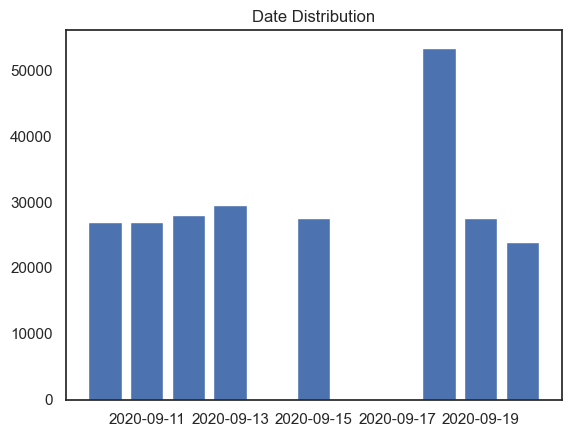

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

value_counts = transaction['date'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Date Distribution')
plt.show()

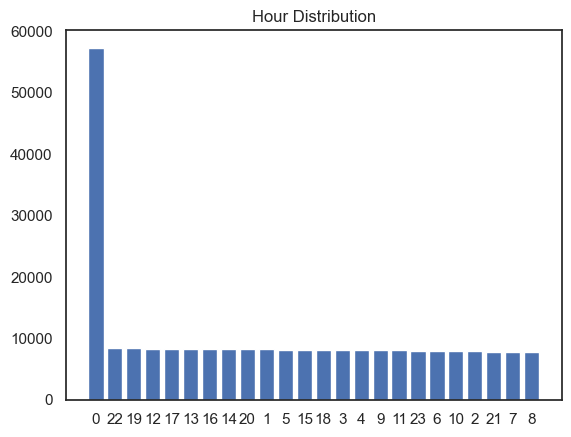

In [61]:
value_counts = transaction['hour'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Hour Distribution')
plt.show()

### Convert to with or without Location Information

In [62]:
transaction['withLocation'] = ~transaction.longitude.isnull()
transaction = transaction.drop(columns=['longitude', 'latitude'])
transaction.head()

,hmid,clicked,listprice,deviceLanguage,deviceType,webDomain,webUrl,appId,appstoreLink,adSize,adFormat,alzCampaignId,alzAdGroupId,creativeId,date,hour,withLocation
0,ca20d5a1efb5493c8fb3871e909ccfda,False,0.000125,zh_TW,PC,on.cc,https://hk.on.cc/hk/bkn/cnt/news/20200918/bkn-...,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-19,5,True
1,e1bcbb3947d24c16ab272da0171bef22,False,0.000299,zh_TW,M,appledaily.com,https://hk.appledaily.com/entertainment/202009...,NaN,NaN,300 x 250,D,11137,12715,20392,2020-09-19,20,True
2,81063f1d1fc14df1a53c82aa8441dd1c,False,0.000222,zh_TW,M,jetsoclub.com,https://www.jetsoclub.com/2020/09/7-eleven-off...,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-18,1,True
3,cf029187ea9346f6a15c31f28b81d2c8,False,0.000275,zh_TW,PC,discuss.com.hk,https://finance.discuss.com.hk/viewthread.php,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-18,0,True
4,cf029187ea9346f6a15c31f28b81d2c8,False,0.000205,zh_TW,PC,discuss.com.hk,https://finance.discuss.com.hk/forumdisplay.php,NaN,NaN,300 x 250,D,11137,12715,20367,2020-09-18,0,True


### Simplify Ad Posting
There are 101 Domains and 57 Apps  
Which are a lot more managable than their respective links, which are both >3,000  
The content of the app will be processed in NLP when I officially work in Hotmob

In [63]:
transaction['adShown'] = transaction.apply(lambda row: row['webDomain'] if row['webDomain'] else row['appId'], axis=1)
transaction = transaction.drop(columns=['webDomain', 'webUrl', 'appId', 'appstoreLink'])
transaction.head()

,hmid,clicked,listprice,deviceLanguage,deviceType,adSize,adFormat,alzCampaignId,alzAdGroupId,creativeId,date,hour,withLocation,adShown
0,ca20d5a1efb5493c8fb3871e909ccfda,False,0.000125,zh_TW,PC,300 x 250,D,11137,12715,20367,2020-09-19,5,True,on.cc
1,e1bcbb3947d24c16ab272da0171bef22,False,0.000299,zh_TW,M,300 x 250,D,11137,12715,20392,2020-09-19,20,True,appledaily.com
2,81063f1d1fc14df1a53c82aa8441dd1c,False,0.000222,zh_TW,M,300 x 250,D,11137,12715,20367,2020-09-18,1,True,jetsoclub.com
3,cf029187ea9346f6a15c31f28b81d2c8,False,0.000275,zh_TW,PC,300 x 250,D,11137,12715,20367,2020-09-18,0,True,discuss.com.hk
4,cf029187ea9346f6a15c31f28b81d2c8,False,0.000205,zh_TW,PC,300 x 250,D,11137,12715,20367,2020-09-18,0,True,discuss.com.hk


### Language
Considering the majority of language option is in en/ zh_TW/ zh_CN  
We can safely categorize other language into others

In [64]:
transaction['deviceLanguage'] = transaction['deviceLanguage'].apply(lambda x: x if x in ['zh_TW', 'zh_CN', 'en'] else "Others")

### Finally, eliminate any columns that are not required
* adFormat: Only a single value
* alzCampaignId: Only a single value

In [65]:
transaction = transaction.drop(columns=['alzCampaignId', 'adFormat'])

## Correlation Study

In [66]:
transaction.head()

,hmid,clicked,listprice,deviceLanguage,deviceType,adSize,alzAdGroupId,creativeId,date,hour,withLocation,adShown
0,ca20d5a1efb5493c8fb3871e909ccfda,False,0.000125,zh_TW,PC,300 x 250,12715,20367,2020-09-19,5,True,on.cc
1,e1bcbb3947d24c16ab272da0171bef22,False,0.000299,zh_TW,M,300 x 250,12715,20392,2020-09-19,20,True,appledaily.com
2,81063f1d1fc14df1a53c82aa8441dd1c,False,0.000222,zh_TW,M,300 x 250,12715,20367,2020-09-18,1,True,jetsoclub.com
3,cf029187ea9346f6a15c31f28b81d2c8,False,0.000275,zh_TW,PC,300 x 250,12715,20367,2020-09-18,0,True,discuss.com.hk
4,cf029187ea9346f6a15c31f28b81d2c8,False,0.000205,zh_TW,PC,300 x 250,12715,20367,2020-09-18,0,True,discuss.com.hk


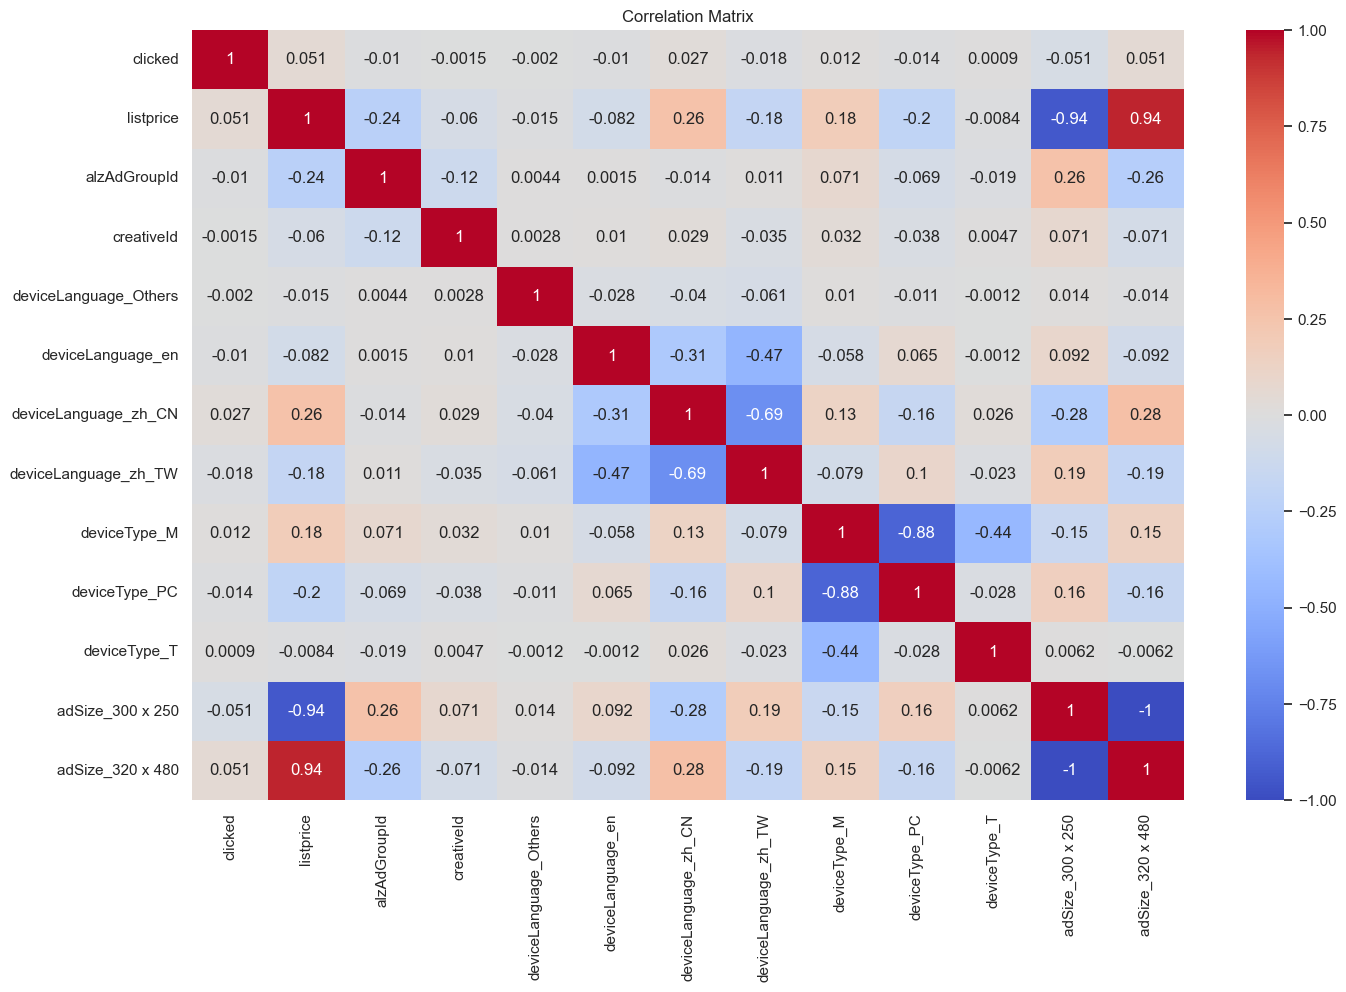

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cat_columns = ['deviceLanguage', 'deviceType', 'adSize', 'alzAdGroupId', 'creativeId']
num_columns = ['clicked', 'listprice']

# Create dummy variables for categorical columns
dummy_df = pd.get_dummies(transaction[cat_columns])
# Combine dummy variables with numerical columns
new_df = pd.concat([transaction[num_columns], dummy_df], axis=1)
# Assuming the DataFrame is called 'df'
corr_matrix = new_df.corr()

# Create a heatmap using Seaborn
sns.set(style="white")
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [68]:
orig_avg_clicked = transaction.clicked.mean()
zhm_avg_clicked = transaction[(transaction['deviceType'] == "M") & (transaction['deviceLanguage'] == "zh_CN")].clicked.mean()

print(f"""Original Average Click Rate: {(orig_avg_clicked * 100):.2f}%
Sim Chinese Mobile Only Average List Price: {(zhm_avg_clicked * 100):.2f}%
Percent Increase: {((zhm_avg_clicked - orig_avg_clicked)/ orig_avg_clicked * 100):.2f}%
""")

Original Average Click Rate: 0.45%
Sim Chinese Mobile Only Average List Price: 0.73%
Percent Increase: 60.60%



In [69]:
orig_avg_list_price = transaction.listprice.mean()
orig_avg_clicked = transaction.clicked.mean()
large_avg_list_price = transaction[transaction['adSize'] == "320 x 480"].listprice.mean()
large_avg_clicked = transaction[transaction['adSize'] == "320 x 480"].clicked.mean()

print(f"""Original Average Click Rate: {(orig_avg_clicked*100):.2f}%
Large Ad Only Average Click Rate: {(large_avg_clicked*100):.2f}%
Percent Increase: {((large_avg_clicked - orig_avg_clicked)/ orig_avg_clicked * 100):.2f}%
""")

print(f"""Original Average List Price: ${orig_avg_list_price:.5f}
Large Ad Only Average List Price: ${large_avg_list_price:.5f}
Percent Increase: {((large_avg_list_price - orig_avg_list_price)/ orig_avg_list_price * 100):.2f}%
""")

Original Average Click Rate: 0.45%
Large Ad Only Average Click Rate: 0.93%
Percent Increase: 105.02%

Original Average List Price: $0.00043
Large Ad Only Average List Price: $0.00073
Percent Increase: 70.73%



### Insights
Though small, but we can notice positive correlation between 'clicked' and 'zh_CN'+'Mobile Device'+'adSize'. To maximize click rate:

* Target Mobile devices in Simplified Chinese (zh_CN)
    * Increase click rate by 61%
* Increase adSize, use 320 x 480 Only
    * Increase click rate by 105%
    * Might violate client requirement
    * Increase Cost by 71%

# Prediction Model

## Prepare Training Data
We would use users interest to predict if they are more or less likely to click on an Ad related to fast food

In [70]:
dummy_profile = profile.pivot(index = "hmid", columns = 'segment', values='confidence')
dummy_profile

segment,Age Group 18-24,Age Group 25-34,Age Group 35-44,Age Group 45-54,Age Group 55-64,Age Group 65+,Automotive,Automotive>Auto Body Styles,Automotive>Auto Body Styles>Commercial Trucks,Automotive>Auto Body Styles>Convertible,...,Video Gaming>Video Game Genres>Action Video Games,Video Gaming>Video Game Genres>Adventure Video Games,Video Gaming>Video Game Genres>Educational Video Games,Video Gaming>Video Game Genres>Exercise and Fitness Video Games,Video Gaming>Video Game Genres>Puzzle Video Games,Video Gaming>Video Game Genres>Role-Playing Video Games,Video Gaming>Video Game Genres>Simulation Video Games,Video Gaming>Video Game Genres>Sports Video Games,Video Gaming>Video Game Genres>Strategy Video Games,Video Gaming>eSports
hmid,,,,,,,,,,,,,,,,,,,,,
00007bfd9cd4448cba33270f9d821f65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002be6911074154bd05d61259d4d028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000381b454454154a4f478236c09db6f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004699a170343f2928912d6616feae6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000589e3a7e247459b64d47f35023f77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9373732734eb58b045a434ef53ac7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffa02ef9f0f4d0d9c6f2e36741c7bde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffa284935f04ca79e0c9249b3fa0696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
test_transaction = transaction[['hmid', 'clicked', 'date']]
test_transaction = test_transaction.drop_duplicates(keep='first')
test_transaction

,hmid,clicked,date
0,ca20d5a1efb5493c8fb3871e909ccfda,False,2020-09-19
1,e1bcbb3947d24c16ab272da0171bef22,False,2020-09-19
2,81063f1d1fc14df1a53c82aa8441dd1c,False,2020-09-18
3,cf029187ea9346f6a15c31f28b81d2c8,False,2020-09-18
5,ca20d5a1efb5493c8fb3871e909ccfda,False,2020-09-18
...,...,...,...
243959,1694ca26ce844ec78b7cfc3a5ededf4e,False,2020-09-19
243962,21771724db7747ca86a89a3433cbfc9e,False,2020-09-18
243963,c5600eed5afe4d4c806b0c11bc4382d9,True,2020-09-18
243965,6da2990fa19644e1acc75f921e5c1b2f,False,2020-09-20


In [72]:
result = dummy_profile.merge(test_transaction, left_index=True, right_on='hmid')

In [73]:
print("Each Column as >90% Null Value")
print(result.isnull().sum()/result.isnull().count())
result = result.fillna(0)
result.head()

Each Column as >90% Null Value
Age Group 18-24                                        0.996772
Age Group 25-34                                        0.984258
Age Group 35-44                                        0.972948
Age Group 45-54                                        0.974463
Age Group 55-64                                        0.944009
                                                         ...   
Video Gaming>Video Game Genres>Strategy Video Games    0.998038
Video Gaming>eSports                                   0.997852
hmid                                                   0.000000
clicked                                                0.000000
date                                                   0.000000
Length: 561, dtype: float64


,Age Group 18-24,Age Group 25-34,Age Group 35-44,Age Group 45-54,Age Group 55-64,Age Group 65+,Automotive,Automotive>Auto Body Styles,Automotive>Auto Body Styles>Commercial Trucks,Automotive>Auto Body Styles>Convertible,...,Video Gaming>Video Game Genres>Exercise and Fitness Video Games,Video Gaming>Video Game Genres>Puzzle Video Games,Video Gaming>Video Game Genres>Role-Playing Video Games,Video Gaming>Video Game Genres>Simulation Video Games,Video Gaming>Video Game Genres>Sports Video Games,Video Gaming>Video Game Genres>Strategy Video Games,Video Gaming>eSports,hmid,clicked,date
178680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00007bfd9cd4448cba33270f9d821f65,False,2020-09-12
115808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0002be6911074154bd05d61259d4d028,False,2020-09-13
103753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000381b454454154a4f478236c09db6f,False,2020-09-11
204002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0004699a170343f2928912d6616feae6,False,2020-09-20
52658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000589e3a7e247459b64d47f35023f77,False,2020-09-13


## Cut the data to 5-Fold
We cut the data by date to simulate real life decision situation

In [74]:
import datetime
test = result[result['date'] == datetime.date(2020, 9, 19)]
valid = result[result['date'] == datetime.date(2020, 9, 20)]
train = result[result['date'] < datetime.date(2020, 9, 19)]

print(f"""Split into 5-Fold, 4 for training and 1 for test + validation:
train size: {len(train)}
test size: {len(test)}
valid size: {len(valid)}
""")

train_X = train.drop(columns=['hmid', 'clicked', 'date'])
train_y = train['clicked']
test_X = test.drop(columns=['hmid', 'clicked', 'date'])
test_y = test['clicked']
valid_X = valid.drop(columns=['hmid', 'clicked', 'date'])
valid_y = valid['clicked']

Split into 5-Fold, 4 for training and 1 for test + validation:
train size: 64018
test size: 9981
valid size: 6550



## Hyperparameter Tuning
We use InterpretML's ExplainableBoostingClassifier for easy explanation of model decision & it is robust towards missing values  
And we use Hyperopt to find the best performing hyperparameters based on the testing dataset

In [75]:
from hyperopt import fmin, tpe, hp, Trials
from interpret.glassbox import ExplainableBoostingClassifier
from util import draw_roc_curve, draw_confusion_matrix
from sklearn.metrics import roc_auc_score

# define a search space for the hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'max_bins': hp.choice('max_bins', range(2, 255)),
    'interactions': hp.choice('interactions', range(1, 10))
}
# define a function to optimize the hyperparameters
def objective(params):
    # create a decision tree classifier with the given hyperparameters
    clf = ExplainableBoostingClassifier(**params)
    # train and evaluate the classifier
    clf.fit(train_X, train_y)
    score = roc_auc_score(test_y, clf.predict_proba(test_X)[:, 1])
    return -score  # minimize negative score to maximize accuracy

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

100%|██████████████████████████████████████████████| 10/10 [20:23<00:00, 122.31s/trial, best loss: -0.6868235087013379]


Validation ROC: 0.683


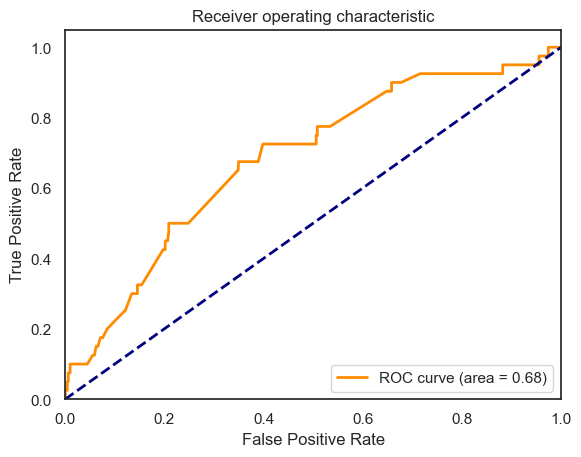

In [76]:
# Train the classifier on the best hyperparameters found
clf = ExplainableBoostingClassifier(
    learning_rate=best['learning_rate'], 
    max_bins=best['max_bins'], 
    interactions=int(best['interactions']), 
)
clf.fit(train_X, train_y)

# Evaluate the classifier on the test set
score = roc_auc_score(test_y, clf.predict_proba(test_X)[:, 1])
print(f'Validation ROC: {score:.3f}')
fpr, tpr, thresholds = draw_roc_curve(test_y, clf.predict_proba(test_X)[:, 1])

## Find An Acceptible Cutoff based on the ROC Chart Above
Update the desired_tpr to find the acceptible threshold

In [77]:
import numpy as np
# define the desired tradeoff between TPR and FPR
desired_tpr = 0.8
# find the index of the threshold closest to the desired tradeoff
diff = np.abs(tpr - desired_tpr)
idx = np.argmin(diff)
# get the threshold corresponding to the index
cutoff_threshold = thresholds[idx]
print(f"Cutoff: {cutoff_threshold}")

Cutoff: 0.007164170071488507


## Validate the Perform by using another dataset

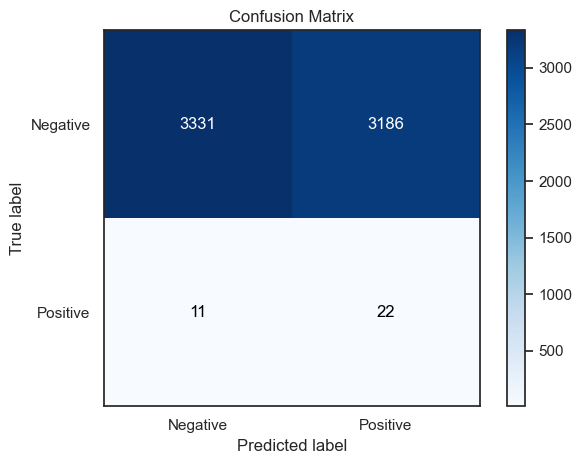

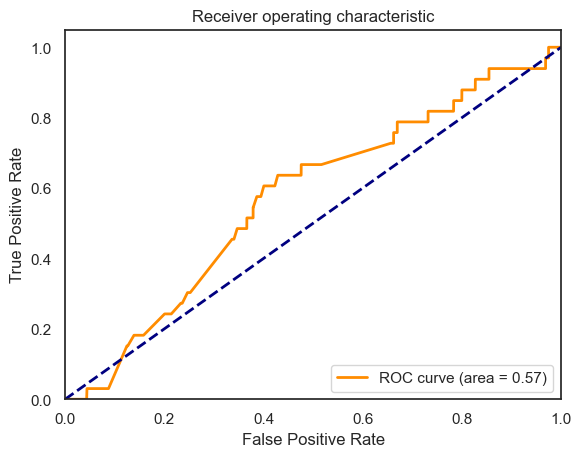

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_true = valid_y
y_score = clf.predict_proba(valid_X)[:, 1]
# assume y_true and y_score are arrays of true labels and predicted scores, respectively
y_pred = (y_score > cutoff_threshold).astype(int)  # convert scores to binary predictions
draw_confusion_matrix(y_true, y_pred)

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

fpr, tpr, thresholds = draw_roc_curve(valid_y, clf.predict_proba(valid_X)[:, 1])

## Explain the Classification Model

In [79]:
from interpret import show
show(clf.explain_global())

<!-- http://127.0.0.1:7001/2168371169648/ -->

### Feature Importance
How different feature contribute to the prediction. For example,

* People who shows interest in "Crime and Mystery Movies" seems to click on Fast Food Ad More often. So on and so forth
* This only demonstrates the overall decision mindset of the prediction model, the reason behind it still needs to be investigated

## Convert to Actionable Decision

C:\Users\wongh\AppData\Local\Temp\ipykernel_1540\1123257928.py:7: RuntimeWarning:

divide by zero encountered in divide



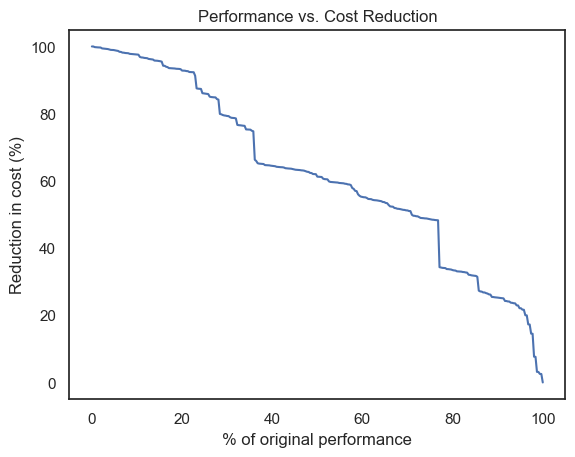

In [80]:
reduced_costs = list()
for threshold in thresholds:
    targeted = sum((y_score >= threshold).astype(int))
    reduced_costs.append((len(y_score) - targeted)/len(y_score) * 100)
    
perf_percent = np.linspace(0, 100, len(tpr))
cost_reduction = 100 * (1 - reduced_costs / tpr)

# create a line chart with the percentage of original performance on the x-axis
# and the percentage reduction in cost on the y-axis
plt.plot(perf_percent, reduced_costs)
plt.xlabel('% of original performance')
plt.ylabel('Reduction in cost (%)')
plt.title('Performance vs. Cost Reduction')
plt.show()

### Actionable Insights and tradeoff
The chart above shows the tradeoff between cost and performance, for example:
* By using the model, you can get <span style="color: green;">80% of the original performance</span> at <span style="color: green;">35% reduction in cost</span>

# Discussion

I have exhibited essential skills that are necessary for a data scientist. Furthermore, I have accomplished the following:

* Streamlining the laborious process of model tuning through automation
* Communicating performance and decision-making through intuitive ROC curves and feature importance analysis
* Translating model predictions into actionable business insights for non-technical stakeholders

These achievements have placed me in a position of advantage over other professionals in this field.